# My Libraries & Packages Installation


In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


Load and Read data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [3]:
original_data = pd.read_csv('water_potability.csv')
data = copy.deepcopy(original_data)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Data Analysis

*Knowing my data*

In [4]:
print('\nData Information:\n')
print(data.info())

print('\nData Shape:\n' , data.shape)

print('\nFind Duplicates:\n', data.duplicated().sum())

tMissing = int((data.isnull().sum().sum() / np.product(data.shape)) * 100)
print("\nTotal Missing values from data is \n" , tMissing, "%")

NullCol = data[data.columns[data.isnull().any()]]
print('\nColumns Containing Null values:\n', (NullCol.isnull().sum()))

multi_null_rows = data.isnull().sum(axis=1) > 1
print('\nNumber of rows with more than one null value:', multi_null_rows.sum())



Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Data Shape:
 (3276, 10)

Find Duplicates:
 0

Total Missing values from data is 
 4 %

Columns Containing Null values:
 ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

Number of rows with more than one null value: 160




---



> The training-set has 3276 examples and 9 features + the target variable (potability). 9 of the features are floats and 1 is integer.

  

> Scientific search info;





  1. PH:-  Measure of the acidity or alkalinity of water. It is a logarithmic scale that ranges from 0 to 14, with 7 being neutral.

  2. Hardness:-  The concentration of calcium and magnesium ions in water.

  3. Solids:-  The total amount of dissolved and suspended matter in water.

  4. Chloramines:-   A disinfectant used to treat water, formed by combining chlorine and ammonia.

  5. Sulfate:- The concentration of sulfate ions in water.

  6. Conductivity:-  A measure of the water's ability to conduct electricity, indicate the presence of dissolved minerals or contaminants.

  7. Organic carbon:-  The amount of organic matter present in water, which can include natural substances and pollutants.

  8. Trihalomethanes:-   A group of DBPs formed when chlorine or other disinfectants react with organic matter in water.

  9. Turbidity:-  A measure of the water's clarity, caused by suspended particles,  indicate the presence of contaminants.



---



*Statistical Analysis*

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


*Outliers*

In [6]:
def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data < lower_bound) | (data > upper_bound)].index.tolist()
    return outliers

for column in data.columns:
  outliers = detect_outliers_iqr(data[column])
  num_outliers = len(outliers)
  print(f"{column}: {num_outliers} outliers")



ph: 46 outliers
Hardness: 83 outliers
Solids: 47 outliers
Chloramines: 61 outliers
Sulfate: 41 outliers
Conductivity: 11 outliers
Organic_carbon: 25 outliers
Trihalomethanes: 33 outliers
Turbidity: 19 outliers
Potability: 0 outliers


*Distribution*

<ipython-input-7-63fb3018418c>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  var.hist(ax=ax)


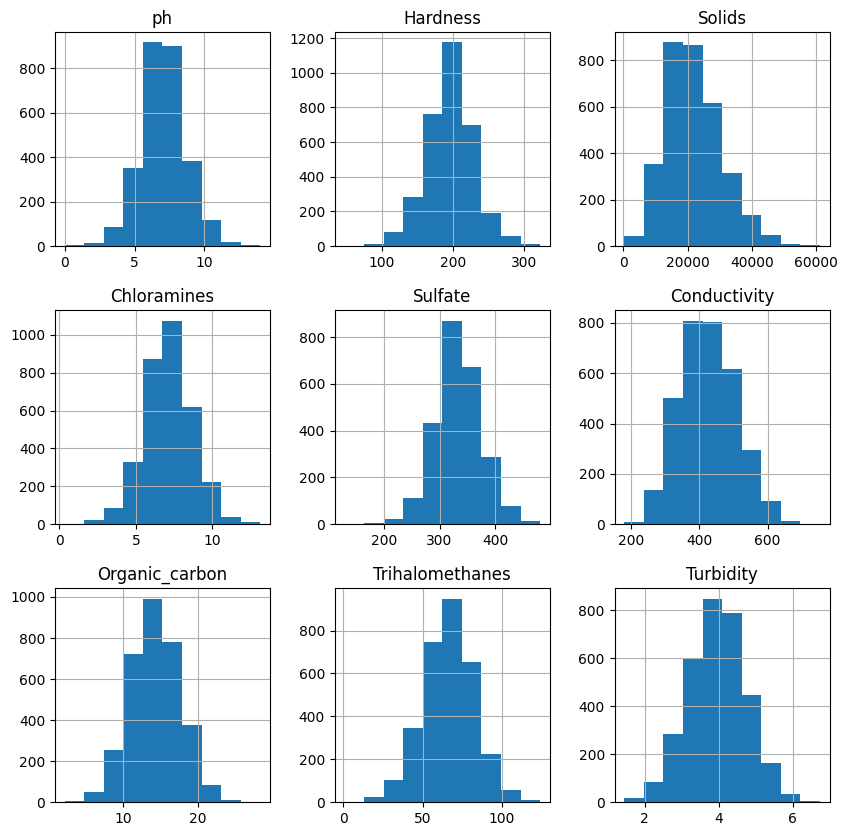

In [7]:
fig = plt.figure(figsize = (10,10))
var = data.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();



---




> The features exhibit a similar distribution and resemble a Gaussian shape, indicating that normalization may not be necessary.



---




*Correlation between Features*
1. Quantifies the strength and direction of the linear relationship between two variables.
2. Used for feature engineering, selection, data exploration, and model evaluation.
3. Helps identify redundant features and select relevant features.
4. Provides insights into the relationships between variables in your dataset.
5. Does not imply causation.
6. Should be used in conjunction with other techniques and domain knowledge..

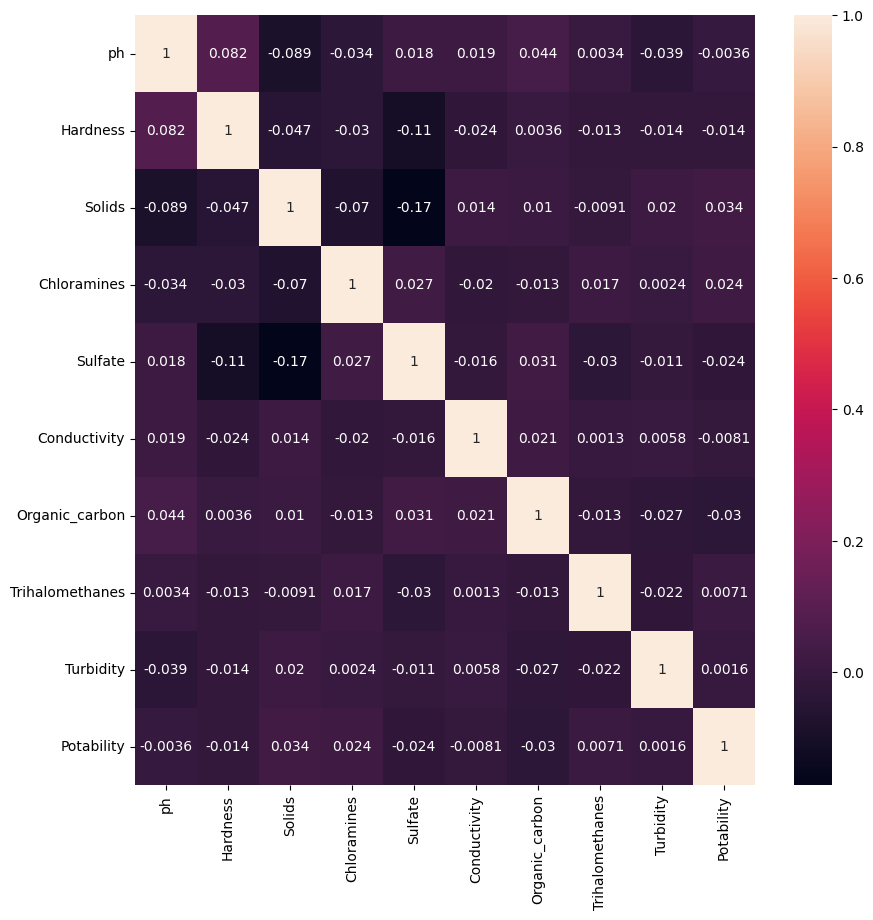

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt=".2g")
plt.show()




---


> Potability is showing 0.034 (highest positive value) with relation to Solids.




---







*Linearity*

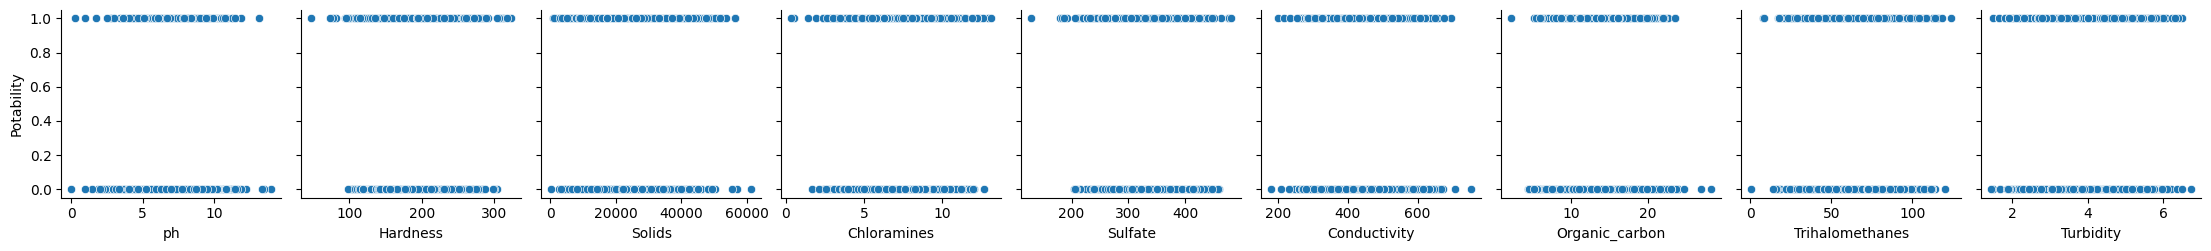

In [9]:
sns.pairplot(data, x_vars=data.columns[:-1], y_vars='Potability')
plt.show()



---

> Indicating Non linearity.
Thus, Ignoring Linear models as
1. Logistic regression
2. SVM
3. Naive bias

Suggestioning useage of ither Tree based models as
1. Decision tree
2. Random Forest
3. XGBoost (if needed)


---




Studing Target Variable



<Figure size 640x480 with 0 Axes>

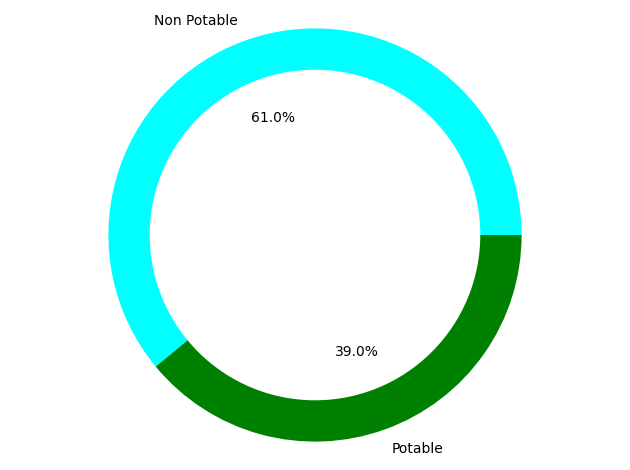

In [10]:
plt.clf()
plt.style.use('ggplot')
fig1, ax1 = plt.subplots()
ax1.pie(data['Potability'].value_counts(), colors=['cyan', 'green'], labels=['Non Potable', 'Potable'],
        autopct='%1.1f%%', startangle=0, rotatelabels=False)
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()



---


> Data is Balanced



---







*Feature Importance & Selection*
1. Improved performance: Reduces noise, improves accuracy, prevents overfitting.
2. Enhanced interpretability: Understands model's workings, predicts reasons.
3. Computational efficiency: Reduces training and deployment costs.
4. Data privacy: Protects sensitive information.
5. Improved efficiency: Streamlines data analysis and modeling.

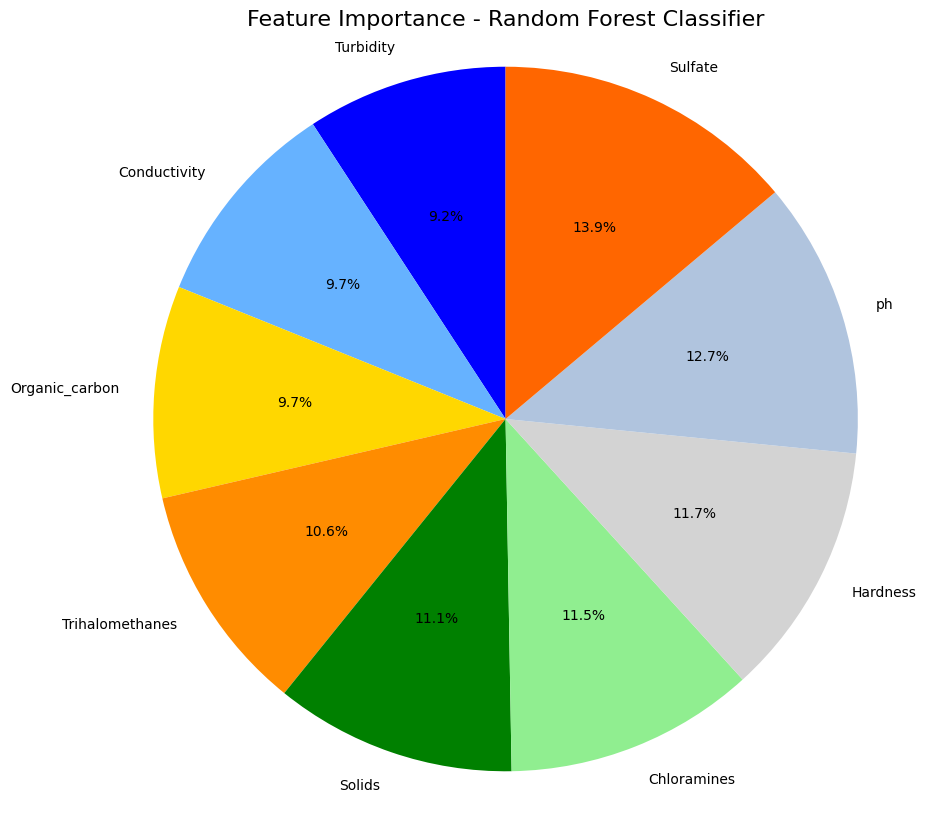

In [11]:
x, y = data.drop('Potability', axis=1), data['Potability']

classification = RandomForestClassifier()
classification.fit(x, y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = classification.feature_importances_
importance = importance.sort_values(by=['Importance'], ascending=True)

labels = importance['Features']
values = importance['Importance']

# Create a  color palette
colors = ['#0000FF', '#66B2FF', '#FFD700', '#FF8C00', '#008000', '#90EE90', '#D3D3D3', '#B0C4DE', '#FF6600']

plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%0.1f%%', startangle=90, colors=colors)
plt.title("Feature Importance - Random Forest Classifier", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()




---


> The pie chart shows that the features are relatively similar in importance, making it difficult to justify eliminating any one without also removing others.


---




## Data Cleaning & Preprocessing

Handling Missing Values

Handling duplicates; In our case no duplicates

In [12]:
# Drop rows with more than one null
def drop_rows_with_more_than_one_null(data):
    data.dropna (thresh=len(data.columns), inplace=True)
    return data

In [13]:
def drop_NA_rows(data):
    data = data.dropna()
    return data

In [14]:
def fill_NA_with_mean(data):
    data = data.fillna(data.mean())
    return data

In [15]:
def hot_deck_imputation(data):
    hot_deck_imputer = KNNImputer(n_neighbors=2, weights="uniform")
    data = hot_deck_imputer.fit_transform(data)
    data = pd.DataFrame(data, columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                                       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
    return data

Handling Outliers

In [16]:
# First, find boundary values:
HA = data.mean() + 3 * data.std()
LA = data.mean() - 3 * data.std()


# 2.1. Trimming of Outliers
def trim_outliers(data):
    data = data[(data < HA) & (data > LA)]
    return data

In [17]:
def cap_outliers(data):
    data = np.where(
        data > HA,
        HA,
        np.where(
            data < LA,
            LA,
            data
        )
    )
    data = pd.DataFrame(data, columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                                       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
    return data

Sampling

In [46]:
def random_sampling(data):
    data_sample = data.sample(frac=0.8, replace=True, random_state=1)
    return data_sample


In [19]:
def stratified_sampling(data):
    data_groups = data.groupby('Potability', group_keys=False)
    data_samples = data_groups.apply(lambda x: x.sample(frac=0.6))
    return data_samples


*Preprocessing Pipeline*

In [31]:
data = copy.deepcopy(original_data)

In [52]:
data = drop_rows_with_more_than_one_null(data)
data = fill_NA_with_mean(data)
data = hot_deck_imputation(data)
data = trim_outliers(data)
data = random_sampling(data)
x, y = data.drop('Potability', axis=1), data['Potability']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##  Classifiers

In [22]:
results = [] # For Visualizing
names = ["KNN",  "Decision Tree",  "Random Forest"]

*Evaluation Matrics*
1. Accuracy: Overall correct predictions.
2. Mean squared error (MSE): Average squared difference between predicted and actual values.
3. Precision: Proportion of correct positive predictions out of all positive predictions.
4. Recall: Proportion of correct positive predictions out of all actual positive instances.
5. Confusion matrix: Table showing true positives, true negatives, false positives, and false negatives.

Train accuracy: 91.03
Test Accuracy: 95.0
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



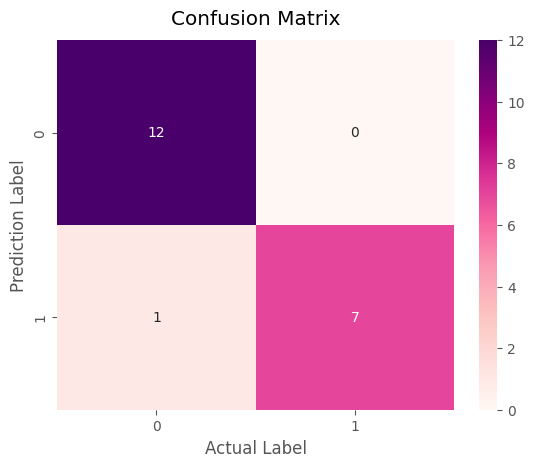

In [53]:
# KNN

neighbors = KNeighborsClassifier(n_neighbors=2)
neighbors.fit(x_train, y_train)
y_predKNN = neighbors.predict(x_test)

acc_knn = round(neighbors.score(x_train, y_train) * 100, 2)

# Model Accuracy
print("Train accuracy:",acc_knn)
print("Test Accuracy:", round( 100*(accuracy_score(y_test, y_predKNN)), 2 ))

print("Classification Report : \n", classification_report(y_test, y_predKNN))

# Confusion Matrix
sns.heatmap( data= confusion_matrix(y_test, y_predKNN)  , annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')


results.append(accuracy_score(y_test, y_predKNN))

Train accuracy: 100.0
Test Accuracy: 95.0
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



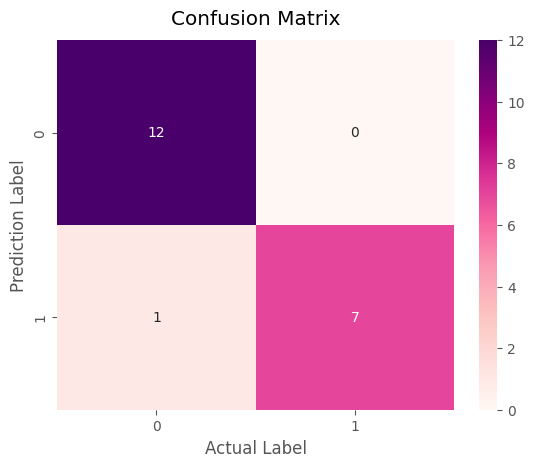

In [55]:
# Decision Tree

DT = DecisionTreeClassifier()
DT = DT.fit(x_train,y_train)
y_predDT = DT.predict(x_test)

acc_decision_tree = round(DT.score(x_train, y_train) * 100, 2)

# Model Accuracy
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(accuracy_score(y_test, y_predDT)))

print("Classification Report : \n", classification_report(y_test, y_predDT))

# Confusion Matrix
sns.heatmap( data= confusion_matrix(y_test, y_predDT)  , annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

results.append(accuracy_score(y_test, y_predDT))

Train accuracy: 57.69
Test Accuracy: 60.0
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        12
         1.0       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


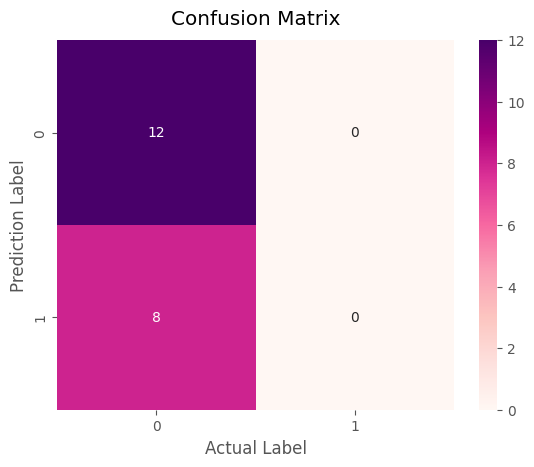

In [56]:
RF = RandomForestClassifier(n_estimators=100, random_state=100,  criterion='entropy', min_samples_leaf=50)
RF.fit(x_train, y_train)
y_predRF = RF.predict(x_test)

accRF = round(RF.score(x_train, y_train) * 100, 2)

# Model Accuracy
print("Train accuracy:",accRF)
print("Test Accuracy:", 100*(accuracy_score(y_test, y_predRF)))

print("Classification Report : \n", classification_report(y_test, y_predRF))

# Confusion Matrix
sns.heatmap( data= confusion_matrix(y_test, y_predRF)  , annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

results.append(accuracy_score(y_test, y_predRF))

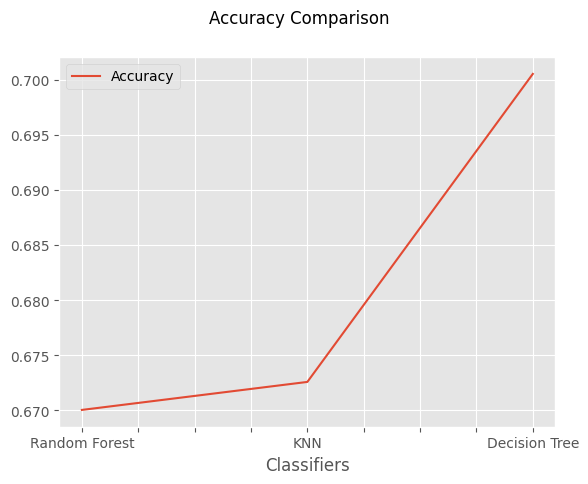

In [26]:
def AccComparison():
    Results_DF = pd.DataFrame({'Classifiers': list(names), 'Accuracy': list(results)}).sort_values('Accuracy', ascending=True)
    Results_DF.plot(x='Classifiers', y='Accuracy', kind='line')
    plt.suptitle('Accuracy Comparison')
    plt.show()

AccComparison()